# Lead Scoring Case Study

## 1. Introduction

### 1.1 Problem Statement :

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

### 1.2 Business Goal :

X Education want to develop a model to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

Goal of the Case Study is :

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## 2. Python Libraries:

### 2.1 Importing Libraries 

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Sci-kit learn libraries
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [3]:
# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

In [4]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

plt.style.use("ggplot")

## 3. Reading & Understanding the data
### 3.1 Importing the Input file

In [5]:
df_lead = pd.read_csv("Leads.csv")
pd.set_option('display.max_columns', None)
df_lead

Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
...                                    ...          ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
...                       ...             ...          ...         ...   
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit            Last Activity       Country  \
0                     0.00  Page Visited on Website           NaN   
1                     2.50             Email Opened         India   
2                     2.00             Email Opened         India   
3                     1.00              Unreachable         India   
4                     1.00        Converted to Lead         India   
...                    ...                      ...           ...   
9235                  2.67        Email Marked Spam  Saudi Arabia   
9236                  2.00                 SMS Sent         India   
9237                  2.00                 SMS Sent         India   
9238                  3.00                 SMS Sent         India   
9239                  3.00                 SMS Sent    Bangladesh   

                 Specialization How did you hear about X Education  \
0                        Select                             Select   
1                        Select                             Select   
2       Business Administration                             Select   
3         Media and Advertising                      Word Of Mouth   
4                        Select                              Other   
...                         ...                                ...   
9235     IT Projects Management                             Select   
9236      Media and Advertising                             Select   
9237    Business Administration                             Select   
9238  Human Resource Management                      Online Search   
9239    Supply Chain Management                             Select   

     What is your current occu

In [6]:
df_lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

### 3.2 Inspecting the Dataframe

In [7]:
#database dimension
print("Database dimension     :",df_lead.shape)
print("Database size          :",df_lead.size)
print("Number of Row          :",len(df_lead.index))
print("Number of Columns      :",len(df_lead.columns))

Database dimension     : (9240, 37)
Database size          : 341880
Number of Row          : 9240
Number of Columns      : 37


In [8]:
#checking numerical columns statistics
df_lead.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [9]:
#info about the column types etc. 
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

The data types of the columns are float, integer and object type. We can see there are some null values in the column.Let's Check the null values

### 3.3 Null Value Calculation

In [10]:
df_lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
# Missing Data Percentage 

round(df_lead.isnull().sum()/df_lead.shape[0], 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.16
How did you hear about X Education               0.24
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

## 4. Data Cleaning

Looking at the dataset we observed that following things need to be done:

- Checking Duplicates
- Encoding categorical variables
- Missing value handling
- Convert the Select into the NaN
- Dropping columns having more than 70% null values

### 4.1 Checking Duplicates

In [12]:
#check for duplicates
sum(df_lead.duplicated(subset = 'Lead Number')) == 0

True

No duplicate values in Lead Number

In [13]:
#dropping Lead Number have all unique values

df_lead.drop(['Lead Number'], 1, inplace = True)

### 4.2 Encoding the variables with yes/no labels to 0/1 's

In [14]:
for feature in ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper'
            ,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses'
            ,'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
           ,'A free copy of Mastering The Interview']:

    df_lead[feature] = df_lead[feature].apply(lambda x : 1 if x=='Yes' else 0)
df_lead.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  Search  Magazine  \
0                       Better Career Prospects       0         0   
1                       Better Career Prospects       0         0   
2                       Better Career Prospects       0         0   
3                       Better Career Prospects       0         0   
4                       Better Career Prospects       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

   Update me on Supply Chain Content  Get updates on DM Content  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0

### 4.3 Converting SELECTs into NaNs:

In [15]:
df_lead.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Last Activity                                  9137 non-null   object
 4   Country                                        6779 non-null   object
 5   Specialization                                 7802 non-null   object
 6   How did you hear about X Education             7033 non-null   object
 7   What is your current occupation                6550 non-null   object
 8   What matters most to you in choosing a course  6531 non-null   object
 9   Tags                                           5887 non-null   

Looking into the labels of the categorical columns

In [16]:
for col in df_lead.iloc[:,1:].select_dtypes(include='object').columns:
    print(col)
    print(df_lead[col].value_counts(normalize= True))
    print("*****************************************")

Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
*****************************************
Lead Source
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Live Chat            0.000217
Social Media         0.000217
Press_Release        0.000217
welearnblog_Home     0.000109
testone              0.000109
youtubechannel       0.000109
WeLearn              0.000109
Pay per Click Ads    0.000109
NC_EDM               0.000109
blog                 0.000109
Name: Lead Source, dtype: float64
*****************************************
Last Activity


In [17]:
# Converting 'Select' values to NaN.
df_lead = df_lead.replace('Select', np.nan)
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   int64  
 4   Do Not Call                                    9240 non-null   int64  
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

### 4.4 Handling Missing Value

Droping the columns which having missing values more than 70%

In [18]:
df_lead = df_lead.drop(df_lead.loc[:,list(round(df_lead.isnull().sum()/df_lead.shape[0], 2)>0.70)].columns, 1)

- There is a huge value of null variables in Some of the columns as seen above 
- But removing the rows with the null value will cost us a lot of data and they are important columns. So, instead we are going to filling or replace the NaN with Significant values. 
- This way we have all the data and almost no null values. In case these come up in the model, it will be of no use and we can drop it off then.

### 4.5: Imputation Of Columns
Lets Impute the data of the following columns:

- Specialization=                                   37.0
- Tags =                                            36.0
- What is your current occupation=                  29.0
- Country=                                          27.0
- What matters most to you in choosing a course=    29.0
- City =                                            40.0

#### 1) Column: 'Specialization'

This column has 37% missing values

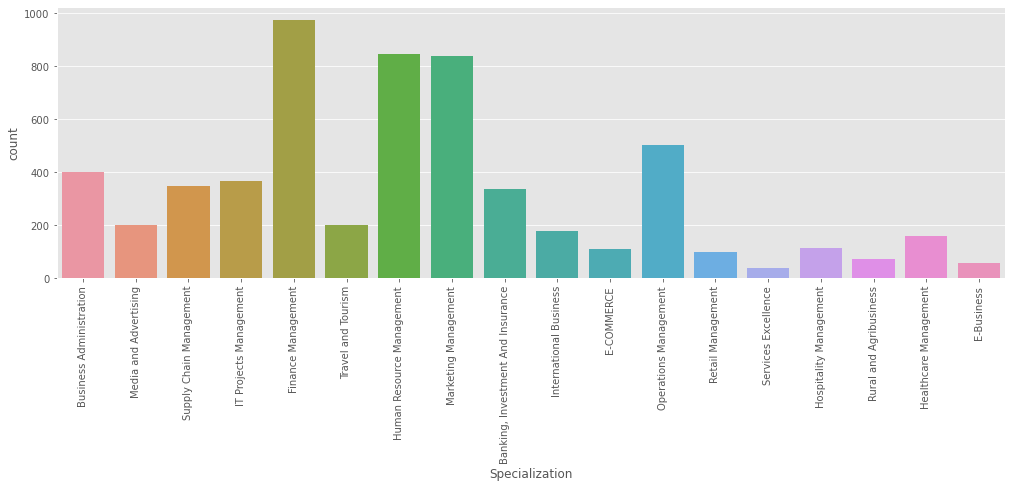

In [19]:
plt.figure(figsize=(17,5))
sns.countplot(df_lead['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [20]:
df_lead["Specialization"].value_counts(normalize=True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Media and Advertising                 3.464164
Travel and Tourism                    3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

There is 37% missing values present in the Specialization column .It may be possible that the lead may leave this column blank if he may be a student or not having any specialization or his specialization is not there in the options given. So we can create a another category 'Others' for this.

In [21]:
# impute NaN with Other
df_lead['Specialization'] = df_lead['Specialization'].replace(np.nan, 'Other')

#### 2) Tags column

'Tags' column has 36% missing values

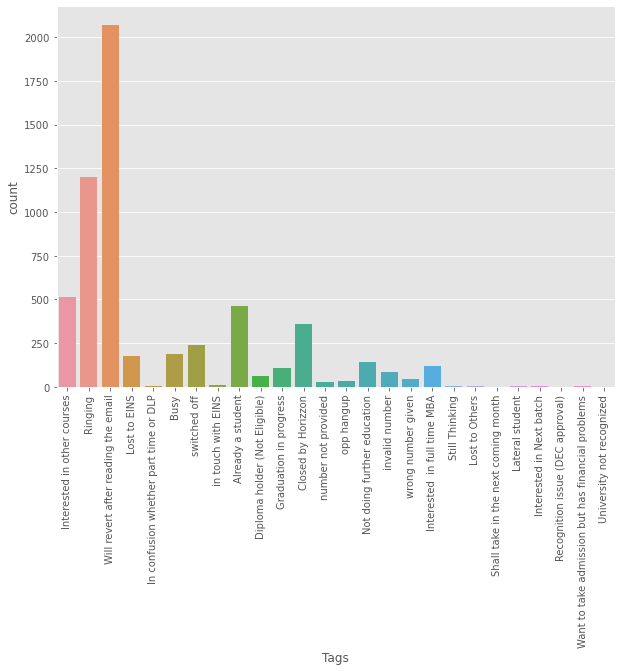

In [22]:
# Visualizing Tags column
plt.figure(figsize=(10,7))
sns.countplot(df_lead['Tags'])
plt.xticks(rotation=90)
plt.show()

In [23]:
df_lead["Tags"].value_counts(normalize=True)*100

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

Since most values are 'Will revert after reading the email' , we can impute missing values in this column with this value.

In [24]:
# More than 30% data is for "Will revert after reading the email" 
# So we can impute NULLS with "Will revert after reading the email"
df_lead['Tags'] = df_lead['Tags'].replace(np.nan, 'Will revert after reading the email')

#### 3) Column: 'What is your current occupation'

This column has 29% missing values

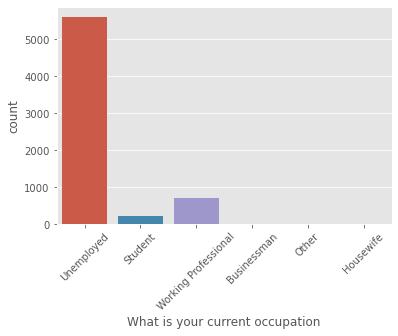

In [25]:
sns.countplot(df_lead['What is your current occupation'])
plt.xticks(rotation=45)
plt.show()

In [26]:
df_lead["What is your current occupation"].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

Since the most values are 'Unemployed' , we can impute missing values in this column with this value.

In [27]:
# Most of the data is of "Unemployed" & So it is better to impute NULLS with Unemployed
df_lead['What is your current occupation'] = df_lead['What is your current occupation'].replace(np.nan, 'Unemployed')

#### 4) Column: 'Country'

This column has 27% missing values

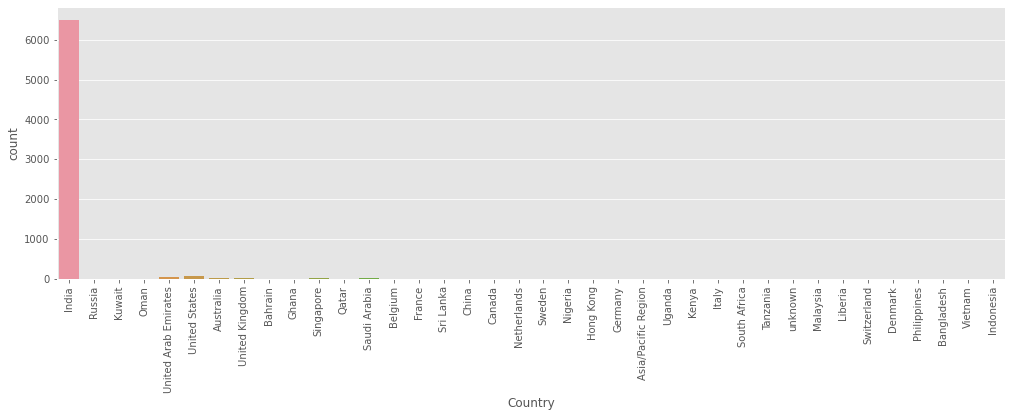

In [28]:
plt.figure(figsize=(17,5))
sns.countplot(df_lead['Country'])
plt.xticks(rotation=90)
plt.show()

In [29]:
df_lead["Country"].value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
Canada                   0.059006
South Africa             0.059006
Kuwait                   0.059006
Germany                  0.059006
Nigeria                  0.059006
Sweden                   0.044254
Philippines              0.029503
Belgium                  0.029503
Uganda                   0.029503
China                    0.029503
Italy                    0.029503
Ghana                    0.029503
Bangladesh               0.029503
Asia/Pacific Region      0.029503
Netherlands              0.029503
Vietnam                  0.014751
Indonesia     

We can see that this is highly skewed column but it is an important information w.r.t. to the lead. Since most values are 'India' , we can impute missing values in this column with this value.

In [30]:
# Most of the data is of "India" and So it is better  to impute NULLS with this value
df_lead['Country'] = df_lead['Country'].replace(np.nan, 'India')

#### 5) Column: 'What matters most to you in choosing a course'

This column has 29% missing values

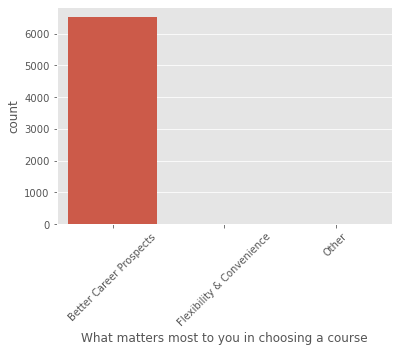

In [31]:
# Visualizing this column
sns.countplot(df_lead['What matters most to you in choosing a course'])
plt.xticks(rotation=45)
plt.show()

In [32]:
df_lead["What matters most to you in choosing a course"].value_counts(normalize=True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

In [33]:
# More than 99% data is of "Better Career Prospects" & So it is safer to impute NULLS with "Better Career Prospects"
df_lead['What matters most to you in choosing a course'] = df_lead['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

#### 6) Column: 'City'

This column has 40% missing values

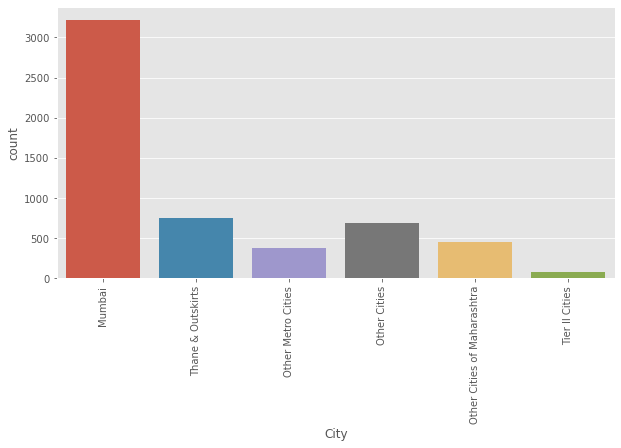

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(df_lead['City'])
plt.xticks(rotation=90)
plt.show()

In [35]:
df_lead["City"].value_counts(normalize=True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

Since most values are 'Mumbai' , we can impute missing values in this column with this value

In [36]:
# We can impute the MUMBAI into all the NULLs as most of the values belong to MUMBAI
df_lead['City'] = df_lead['City'].replace(np.nan, 'Mumbai')

#### 7) Lead Quality

In [37]:
# As the Lead Quality depends upons the intuition of the employee, it will be better to update the NaN to "Not Sure"
df_lead['Lead Quality'] = df_lead['Lead Quality'].replace(np.nan, 'Not Sure')

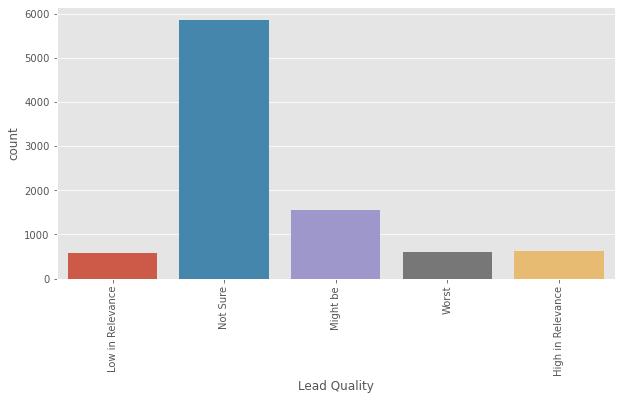

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(df_lead['Lead Quality'])
plt.xticks(rotation=90)
plt.show()

#### There are too many variations in the columns ('Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score') so it better to drop these columns with very high percentage of missing values.

In [39]:
# Removing all the columns that are no required and have 35% null values
df_lead = df_lead.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [40]:
# Checking missing data percentage in the updated dataframe

round(100*(df_lead.isnull().sum()/len(df_lead.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [41]:
# Remaining NULL values are less than 2% and hence these rows can be directly dropped
df_lead.dropna(inplace=True)
df_lead.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization What is your current occupation  \
0   India                    Other                      Unemployed   
1   India                    Other                      Unemployed   
2   India  Business Administration                         Student   
3   India    Media and Advertising                      Unemployed   
4   India                    Other                      Unemployed   

  What matters most to you in choosing a course  Search  Magazine  \
0                       Better Career Prospects       0         0   
1                       Better Career Prospects       0         0   
2                       Better Career Prospects       0         0   
3                       Better Career Prospects       0         0   
4                       Better Career Prospects       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing          Not Sure   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

   Update me on Supply Chain Content  Get updates on DM Content    City  \
0                                  0                          0  Mumbai   
1                                  0                          0  Mumbai   
2                                  0                          0  Mumbai   
3                                  0                          0  Mumbai   
4                                  0                          0  Mumbai   

   I agree to pay the amount through cheque  \
0                                         0   
1                                         0   
2                   

In [42]:
# Finding the null percentages across columns after removing the above columns
round(df_lead.isnull().sum()/len(df_lead.index),2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

Now we don't have any missing value in the dataset.

## 5. Exploratory Data Analysis

In [43]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   int64  
 4   Do Not Call                                    9074 non-null   int64  
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

### 5.1 Data Imbalance

In [44]:
# Lets start with the target variable and see if we have any data imbalance or not 
df_lead["Converted"].value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

In [45]:
converted = df_lead['Converted'].value_counts().rename_axis('unique_values').to_frame('counts')
converted

counts
unique_values        
0                5639
1                3435

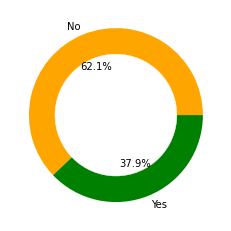

In [46]:
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(converted.counts, labels = ['No','Yes'],colors = ['orange','green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

- In the lead conversion ration, 37.9% has converted to leads where as 62.1% did not convert to a lead. So it seems like a balanced dataset.

- We have good representation of both the classes of data and hence we are good to go with the further analysis

### 5.2 Univariate Analysis

#### Lead Origin

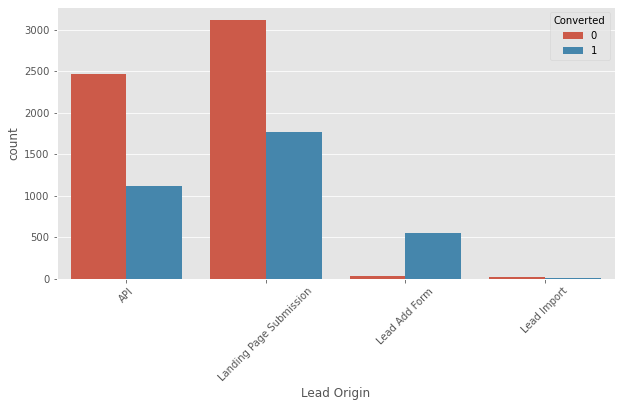

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = df_lead)
plt.xticks(rotation = 45)
plt.show()

- API and Landing Page Submission has less conversion rate(~30%) but counts of the leads from them are considerable

- The count of leads from the Lead Add Form is pretty low but the conversion rate is very high

- Lead Import has very less count as well as conversion rate and hence can be ignored

#### To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'API' and 'Landing Page Submission' and also increasing the number of leads from 'Lead Add Form'

#### Lead Source

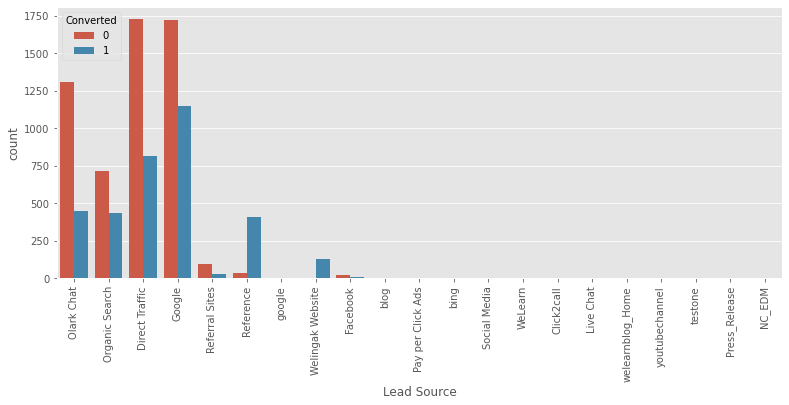

In [48]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

In [49]:
# Need to replace 'google' with 'Google'
df_lead['Lead Source'] = df_lead['Lead Source'].replace(['google'], 'Google')

In [50]:
# We can clearly observe that the count of leads from various sources are close to negligible and hence we can club them into "Others" source for better visualisation and analysis

df_lead['Lead Source'] = df_lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other_Lead_Source')

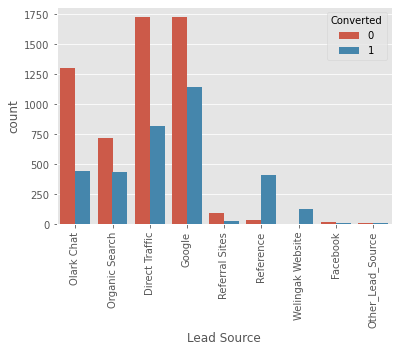

In [51]:
# Plotting Lead Source again

sns.countplot(x="Lead Source", hue="Converted", data= df_lead)
plt.xticks(rotation='vertical')
plt.show()

1) Google and Direct traffic generates maximum number of leads.

2) Conversion Rate of reference leads and leads through welingak website is high.

#### To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'Google', 'Olark Chat', 'Organic Search', 'Direct Traffic' and also increasing the number of leads from 'Reference' and 'Welingak Website'

#### Do not Email

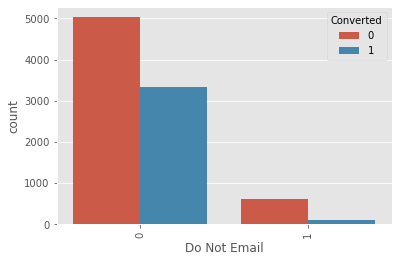

In [52]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

Most entries are 'No'. No Inference can be drawn with this parameter.

#### Do not call

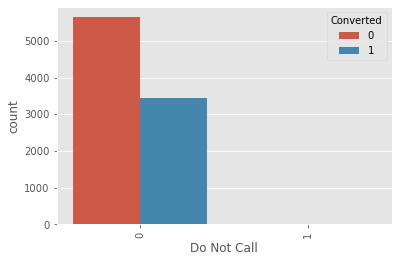

In [53]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

Most entries are 'No'. No Inference can be drawn with this parameter.

#### TotalVisits and Total Time Spent on Website

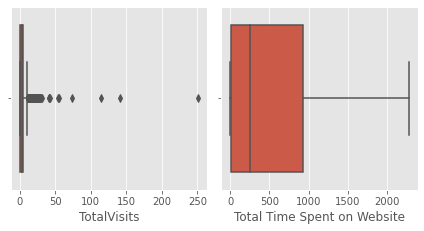

In [54]:
fig=plt.subplots(figsize=(6, 6))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(df_lead[feature])
    plt.tight_layout()

In [55]:
df_lead['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [56]:
# There are lot of outliers in the Total Visits columns and we can cap this variable to 95 percetile 

q1 = df_lead["TotalVisits"].quantile(0.95)
df_lead["TotalVisits"][df_lead["TotalVisits"] >= q1] = q1

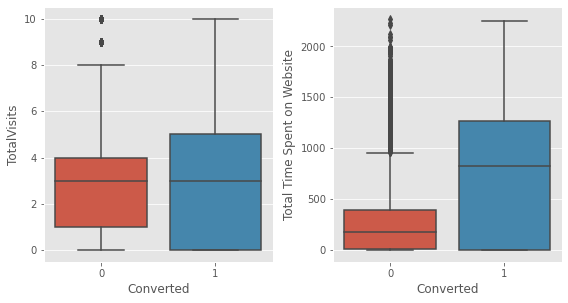

In [57]:
fig=plt.subplots(figsize=(8, 8))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(y = feature, x = 'Converted', data = df_lead)
    plt.tight_layout()

- The median of both the conversion and non-conversion are same and hence nothing conclusive can be said using this information

- Users spending more time on the website are more likely to get converted

#### Websites can be made more appealing so as to increase the time of the Users on websites

#### Page Views Per Visit

In [58]:
df_lead['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

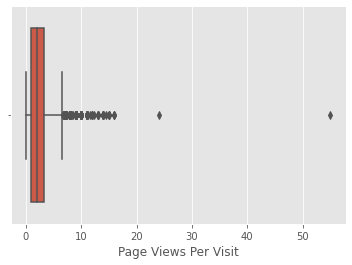

In [59]:
sns.boxplot(df_lead['Page Views Per Visit'])
plt.show()

#### As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [60]:
percentiles = df_lead['Page Views Per Visit'].quantile([0.05,0.95]).values
df_lead['Page Views Per Visit'][df_lead['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df_lead['Page Views Per Visit'][df_lead['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

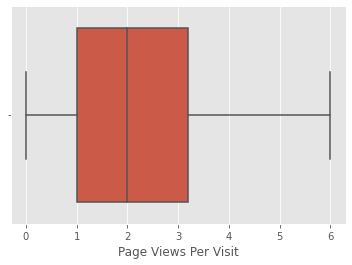

In [61]:
# Visualizing again
sns.boxplot(df_lead['Page Views Per Visit'])
plt.show()

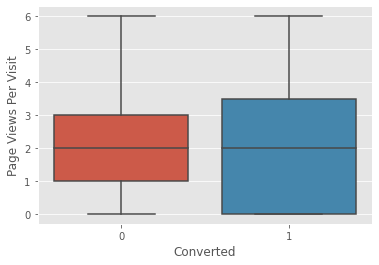

In [62]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =df_lead)
plt.show()

Median for converted and unconverted leads is the same.

#### Nothing can be said specifically for lead conversion from Page Views Per Visit

#### Last Activity

In [63]:
df_lead['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

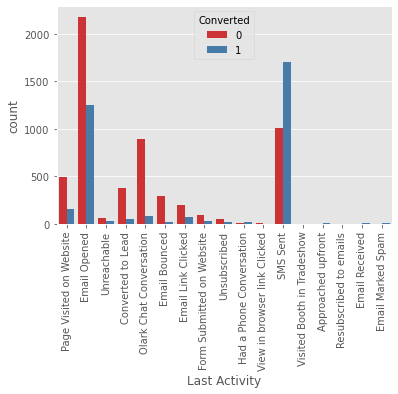

In [64]:
sns.countplot(x = "Last Activity", hue = "Converted", data = df_lead,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [65]:
# Converting all the low count categories to the 'Others' category
df_lead['Last Activity'] = df_lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

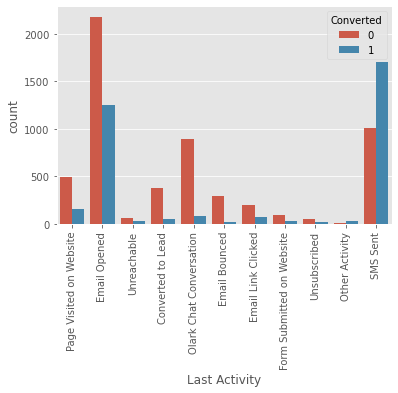

In [66]:
# lets plot the Last Activity again 
sns.countplot(x="Last Activity", hue="Converted", data= df_lead)
plt.xticks( rotation='vertical')
plt.show()

- The count of lst activity as "Email Opened" is max
- The conversion rate of SMS sent as last activity is maximum

#### We should focus on increasing the conversion rate of those having last activity as Email Opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent

#### Country

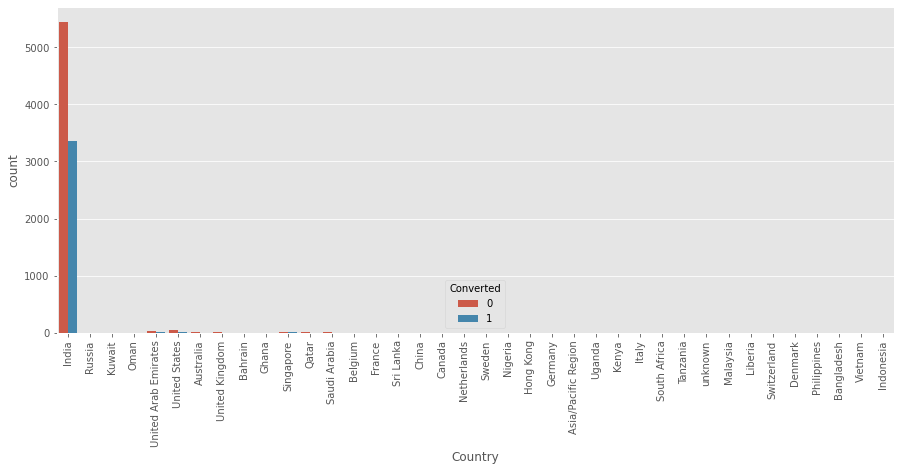

In [67]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

#### Most values are 'India' no such inference can be drawn

#### Specialization and What is your current occupation

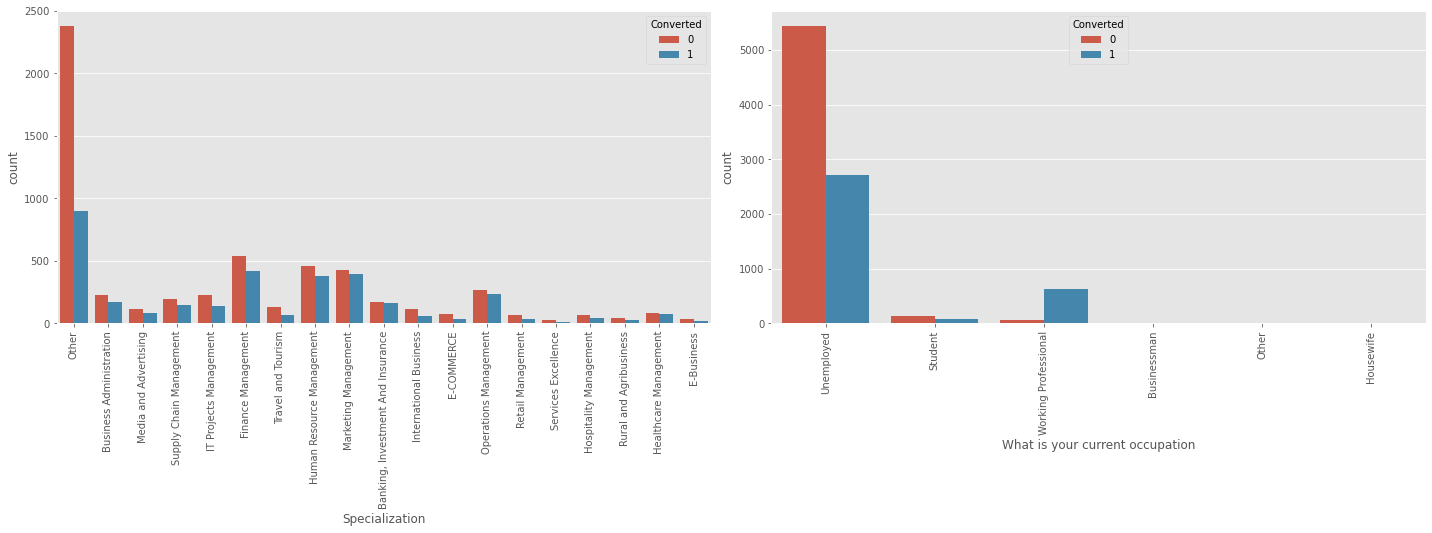

In [68]:
fig=plt.subplots(figsize=(20, 12))

for i, feature in enumerate(["Specialization", "What is your current occupation"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(x=feature, hue="Converted", data=df_lead)
    plt.xticks( rotation='vertical')
    plt.tight_layout()

- Looking at above plot, no particular inference can be made for Specialization
- Looking at above plot, we can say that working professionals have high conversion rate
- Number of Unemployed leads are more than any other category

#### To increase overall conversion rate, we need to increase the number of Working Professional leads by reaching out to them through different social sites such as LinkedIn etc. and also on increasing the conversion rate of Unemployed leads

#### Search

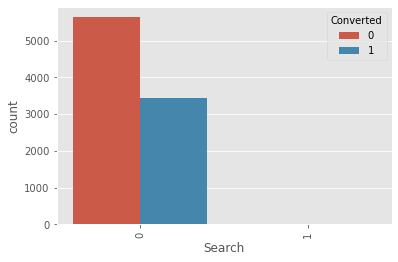

In [69]:
sns.countplot(x = "Search", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

Most entries are 'No'. No Inference can be drawn with this parameter.

#### Magazine

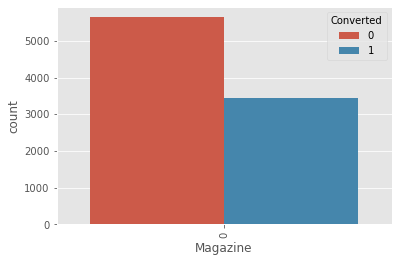

In [70]:
sns.countplot(x = "Magazine", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

Most entries are 'No'. No Inference can be drawn with this parameter.

#### Newspaper Article

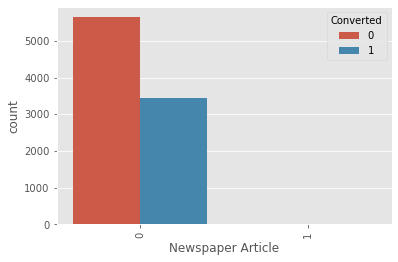

In [71]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

Most entries are 'No'. No Inference can be drawn with this parameter.

#### X Education Forums

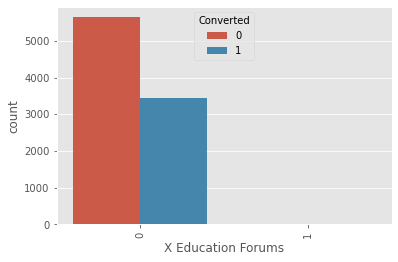

In [72]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

Most entries are 'No'. No Inference can be drawn with this parameter.

#### Newspaper

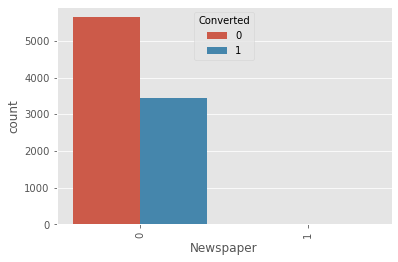

In [73]:
sns.countplot(x = "Newspaper", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

Most entries are 'No'. No Inference can be drawn with this parameter.

#### Digital Advertisement

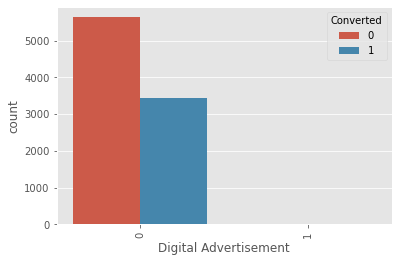

In [74]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

Most entries are 'No'. No Inference can be drawn with this parameter.

#### Through Recommendations

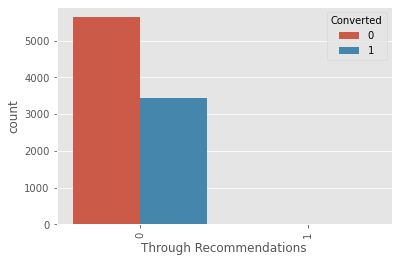

In [75]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data= df_lead)
plt.xticks(rotation = 90)
plt.show()

Most entries are 'No'. No Inference can be drawn with this parameter.

#### Receive More Updates About Our Courses

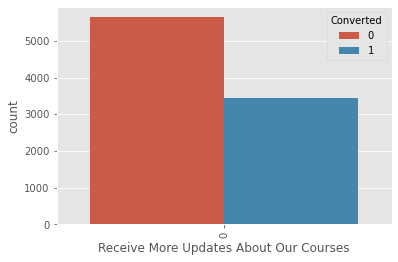

In [76]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

Most entries are 'No'. No Inference can be drawn with this parameter.

#### Update me on Supply Chain Content

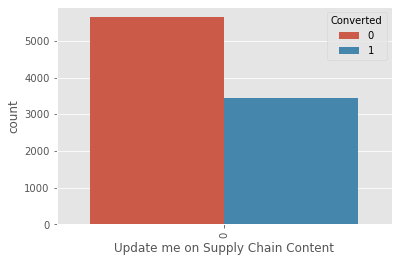

In [77]:
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

Most entries are 'No'. No Inference can be drawn with this parameter.

#### Get updates on DM Content

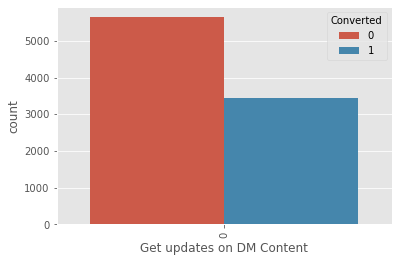

In [78]:
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

Most entries are 'No'. No Inference can be drawn with this parameter.

#### City

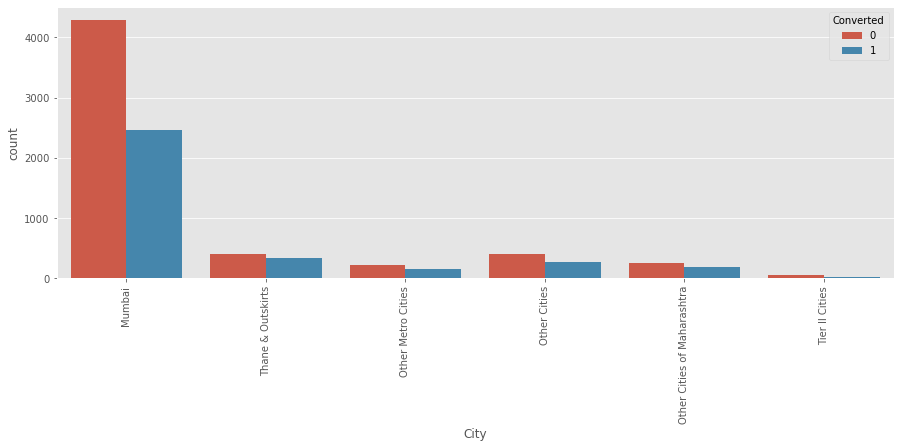

In [79]:
plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

Most leads are from mumbai with around 50% conversion rate.

#### I agree to pay the amount through cheque

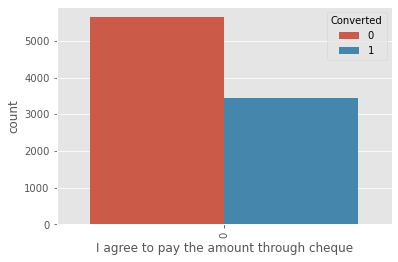

In [80]:
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

Most entries are 'No'. No Inference can be drawn with this parameter.

#### A free copy of Mastering The Interview

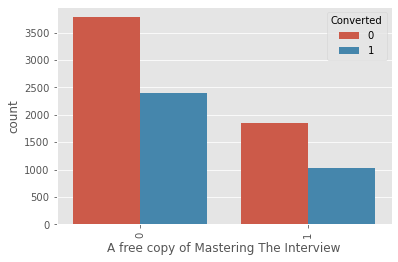

In [81]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

Most entries are 'No'. No Inference can be drawn with this parameter

#### Last Notable Activity

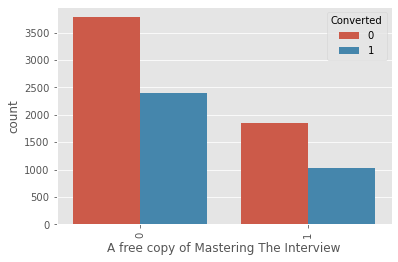

In [82]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

No Inference can be drawn with this parameter

#### Country, What matters most to you in choosing a course, City columns have most values corresponding to one value such as India for Country, Mumbai for city and hence there is no particular insights for these columns 

In [83]:
df_lead['What is your current occupation'] = df_lead['What is your current occupation'].replace("Other", 'Other_Occupation')

In [84]:
df_lead[["Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
         "Through Recommendations","Update me on Supply Chain Content","Get updates on DM Content"
         ,"I agree to pay the amount through cheque","A free copy of Mastering The Interview"]].describe()

Search  Magazine  Newspaper Article  X Education Forums  \
count  9074.000000    9074.0        9074.000000         9074.000000   
mean      0.001543       0.0           0.000220            0.000110   
std       0.039251       0.0           0.014845            0.010498   
min       0.000000       0.0           0.000000            0.000000   
25%       0.000000       0.0           0.000000            0.000000   
50%       0.000000       0.0           0.000000            0.000000   
75%       0.000000       0.0           0.000000            0.000000   
max       1.000000       0.0           1.000000            1.000000   

         Newspaper  Digital Advertisement  Through Recommendations  \
count  9074.000000            9074.000000              9074.000000   
mean      0.000110               0.000441                 0.000771   
std       0.010498               0.020992                 0.027766   
min       0.000000               0.000000                 0.000000   
25%       0.000000               0.000000                 0.000000   
50%       0.000000               0.000000                 0.000000   
75%       0.000000               0.000000                 0.000000   
max       1.000000               1.000000                 1.000000   

       Update me on Supply Chain Content  Get updates on DM Content  \
count                             9074.0                     9074.0   
mean                                 0.0                        0.0   
std                                  0.0                        0.0   
min                                  0.0                        0.0   
25%                                  0.0                        0.0   
50%                                  0.0                        0.0   
75%                                  0.0                        0.0   
max                                  0.0                        0.0   

       I agree to pay the amount through cheque  \
count                                    9074.0   
mean                                        0.0   
std                                         0.0   
min                                         0.0   
25%                                         0.0   
50%                                         0.0   
75%                                         0.0   
max                                         0.0   

       A free copy of Mastering The Interview  
count                             9074.000000  
mean                                 0.318272  
std                                  0.465831  
min                                  0.000000  
25%                                  0.000000  
50%                                  0.000000  
75%                                  1.000000  
max                                  1.000000

#### We can clearly see that most values in the all the columns are 0 i.e. "No" and hence no inference can be made using these columns

#### Lead Quality and Tags

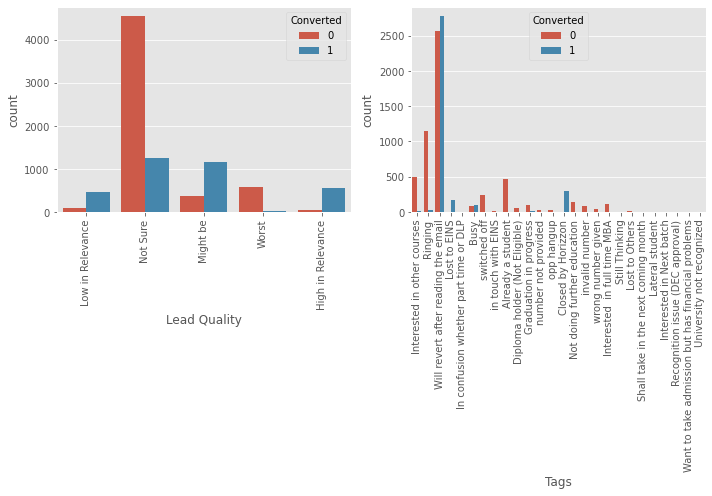

In [85]:
fig=plt.subplots(figsize=(10, 10))

for i, feature in enumerate(["Lead Quality", "Tags"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(x=feature, hue="Converted", data=df_lead)
    plt.xticks( rotation='vertical')
    plt.tight_layout()

In [86]:
# Converting all low count categories to Others category
df_lead['Tags'] = df_lead['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

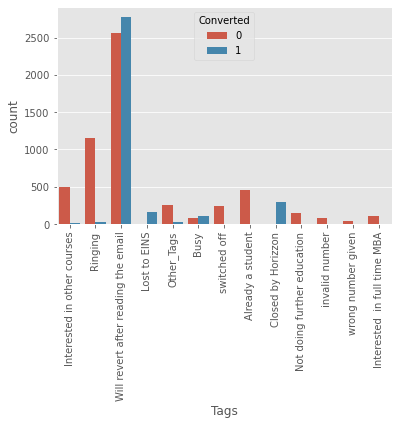

In [87]:
# lets plot the Tags again
sns.countplot(x="Tags", hue="Converted", data= df_lead)
plt.xticks( rotation='vertical')
plt.show()

- 'Will revert after reading the email' and 'Closed by Horizzon' have high conversion rate

#### SUMMARY:

- To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'API' and 'Landing Page Submission' Lead Origins and also increasing the number of leads from 'Lead Add Form'

- To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'Google', 'Olark Chat', 'Organic Search', 'Direct Traffic' and also increasing the number of leads from 'Reference' and 'Welingak Website'

- Websites can be made more appealing so as to increase the time of the Users on websites

- We should focus on increasing the conversion rate of those having last activity as Email Opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent

- To increase overall conversion rate, we need to increase the number of Working Professional leads by reaching out to them through different social sites such as LinkedIn etc. and also on increasing the conversion rate of Unemployed leads

- We also observed that there are multiple columns which contains data of a single value only. As these columns do not contribute towards any inference, we can remove them from further analysis

In [91]:
# Dropping unnecessary columns

df_lead = df_lead.drop(['What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country','Do Not Call'],1)

df_lead.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Converted  TotalVisits  \
0      Olark Chat             0          0          0.0   
1  Organic Search             0          0          5.0   
2  Direct Traffic             0          1          2.0   
3  Direct Traffic             0          0          1.0   
4          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0                    Other                      Unemployed   
1                    Other                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                    Other                      Unemployed   

                                  Tags      Lead Quality    City  \
0          Interested in other courses  Low in Relevance  Mumbai   
1                              Ringing          Not Sure  Mumbai   
2  Will revert after reading the email          Might be  Mumbai   
3                              Ringing          Not Sure  Mumbai   
4  Will revert after reading the email          Might be  Mumbai   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

## 6. Data Preparation

### 6.1 Dummy Variable Creation

In [92]:
#getting a list of categorical columns
cat_cols= df_lead.select_dtypes(include=['object']).columns
cat_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'City', 'Last Notable Activity'],
      dtype='object')

In [93]:
dummy = pd.get_dummies(df_lead[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Other_Lead_Source  Lead Source_Reference  \
0                              0                      0   
1                              0                      0   
2                              0                      0   
3                              0                      0   
4                              0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   
3                           0                                        0   
4                           0                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other Activity  \
0                                      0                             0   
1                                      0                             0   
2                                      0                             0   
3                                      0                             0   
4                                      0                             0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   Last Activity_Unreachable  Last Activity_Unsubscribed  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          1                           0   
4                          0                           0   

   Specia

In [94]:
df_lead = df_lead.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity'], axis=1)
df_lead.head()

Prospect ID  Do Not Email  Converted  TotalVisits  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620             0          0          0.0   
1  2a272436-5132-4136-86fa-dcc88c88f482             0          0          5.0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0          1          2.0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0          0          1.0   
4  3256f628-e534-4826-9d63-4a8b88782852             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  
0                            0                   0.0  
1                          674                   2.5  
2                         1532                   2.0  
3                          305                   1.0  
4                         1428                   1.0

In [95]:
df_lead = pd.concat([df_lead, dummy], axis=1)
df_lead.head()

Prospect ID  Do Not Email  Converted  TotalVisits  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620             0          0          0.0   
1  2a272436-5132-4136-86fa-dcc88c88f482             0          0          5.0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0          1          2.0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0          0          1.0   
4  3256f628-e534-4826-9d63-4a8b88782852             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Other_Lead_Source  Lead Source_Reference  \
0                              0                      0   
1                              0                      0   
2                              0                      0   
3                              0                      0   
4                              0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   
3                           0                                        0   
4                           0                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other Activity  \
0                                      0                             0   
1                                      0                             0   
2                                      0                             0   
3                                      0                             0   
4                                      0               

### 6.2 Test-Train Split

In [96]:
# Putting feature variable to X
X = df_lead.drop(['Prospect ID','Converted'], axis=1)
X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             0          2.0                         1532   
3             0          1.0                          305   
4             0          2.0                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                   0.0                                    0   
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Facebook  \
0                          0                        0                     0   
1                          0                        0                     0   
2                          0                        0                     0   
3                          0                        0                     0   
4                          0                        0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Other_Lead_Source  Lead Source_Reference  \
0                              0                      0   
1                              0                      0   
2                              0                      0   
3                              0                      0   
4                              0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   
3                           0                                        0   
4                           0                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other Activity  \
0                                      0                             0   
1                                      0                             0   
2                                      0                             0   
3                                      0                             0   
4                                      0                             0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3       

In [97]:
# Putting target variable to y
y = df_lead['Converted']
y

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9074, dtype: int64

In [98]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [99]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 3009 to 5754
Data columns (total 84 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6351 non-null   int64  
 1   TotalVisits                                           6351 non-null   float64
 2   Total Time Spent on Website                           6351 non-null   int64  
 3   Page Views Per Visit                                  6351 non-null   float64
 4   Lead Origin_Landing Page Submission                   6351 non-null   uint8  
 5   Lead Origin_Lead Add Form                             6351 non-null   uint8  
 6   Lead Origin_Lead Import                               6351 non-null   uint8  
 7   Lead Source_Facebook                                  6351 non-null   uint8  
 8   Lead Source_Google                                    6

### 6.3 Feature Scaling
Feature Scaling: We standardized the numeric attributes so they have a common mean of zero, if they were measured on different scales

In [100]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
3009             0    -0.432779                    -0.160255   
1012             1    -0.432779                    -0.540048   
9226             0    -1.150329                    -0.888650   
4750             0    -0.432779                     1.643304   
7987             0     0.643547                     2.017593   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
3009             -0.155018                                    1   
1012             -0.155018                                    1   
9226             -1.265540                                    0   
4750             -0.155018                                    1   
7987              0.122613                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
3009                          0                        0   
1012                          0                        0   
9226                          0                        0   
4750                          0                        0   
7987                          0                        0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
3009                     0                   0                       0   
1012                     0                   0                       0   
9226                     0                   0                       1   
4750                     0                   0                       0   
7987                     0                   0                       0   

      Lead Source_Organic Search  Lead Source_Other_Lead_Source  \
3009                           0                              0   
1012                           0                              0   
9226                           0                              0   
4750                           0                              0   
7987                           0                              0   

      Lead Source_Reference  Lead Source_Referral Sites  \
3009                      0                           0   
1012                      0                           0   
9226                      0                           0   
4750                      0                           0   
7987                      0                           0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
3009                             0                            0   
1012                             0                            1   
9226                             0                            0   
4750                             0                            0   
7987                             0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
3009                                 0                           1   
1012                                 0                           0   
9226                                 0                           0   
4750                                 0                           0   
7987                                 0                           0   

      Last Activity_Form Submitted on Website  \
3009                                        0   
1012                                        0   
9226                                        0   
4750                                        0   
7987                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Other Activity  \
3009                                      0                             0   
1012                                      0                             0   
9226                                      0                             0   
4750                                      0                             0   
7987                                      0                             0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
3

In [101]:
#Checking the Conversion Rate
print("Conversion rate = ", (sum(df_lead['Converted'])/len(df_lead['Converted'].index))*100)

Conversion rate =  37.85541106458012


We have almost 38% lead conversion rate.

### 6.4 Looking at Correlations

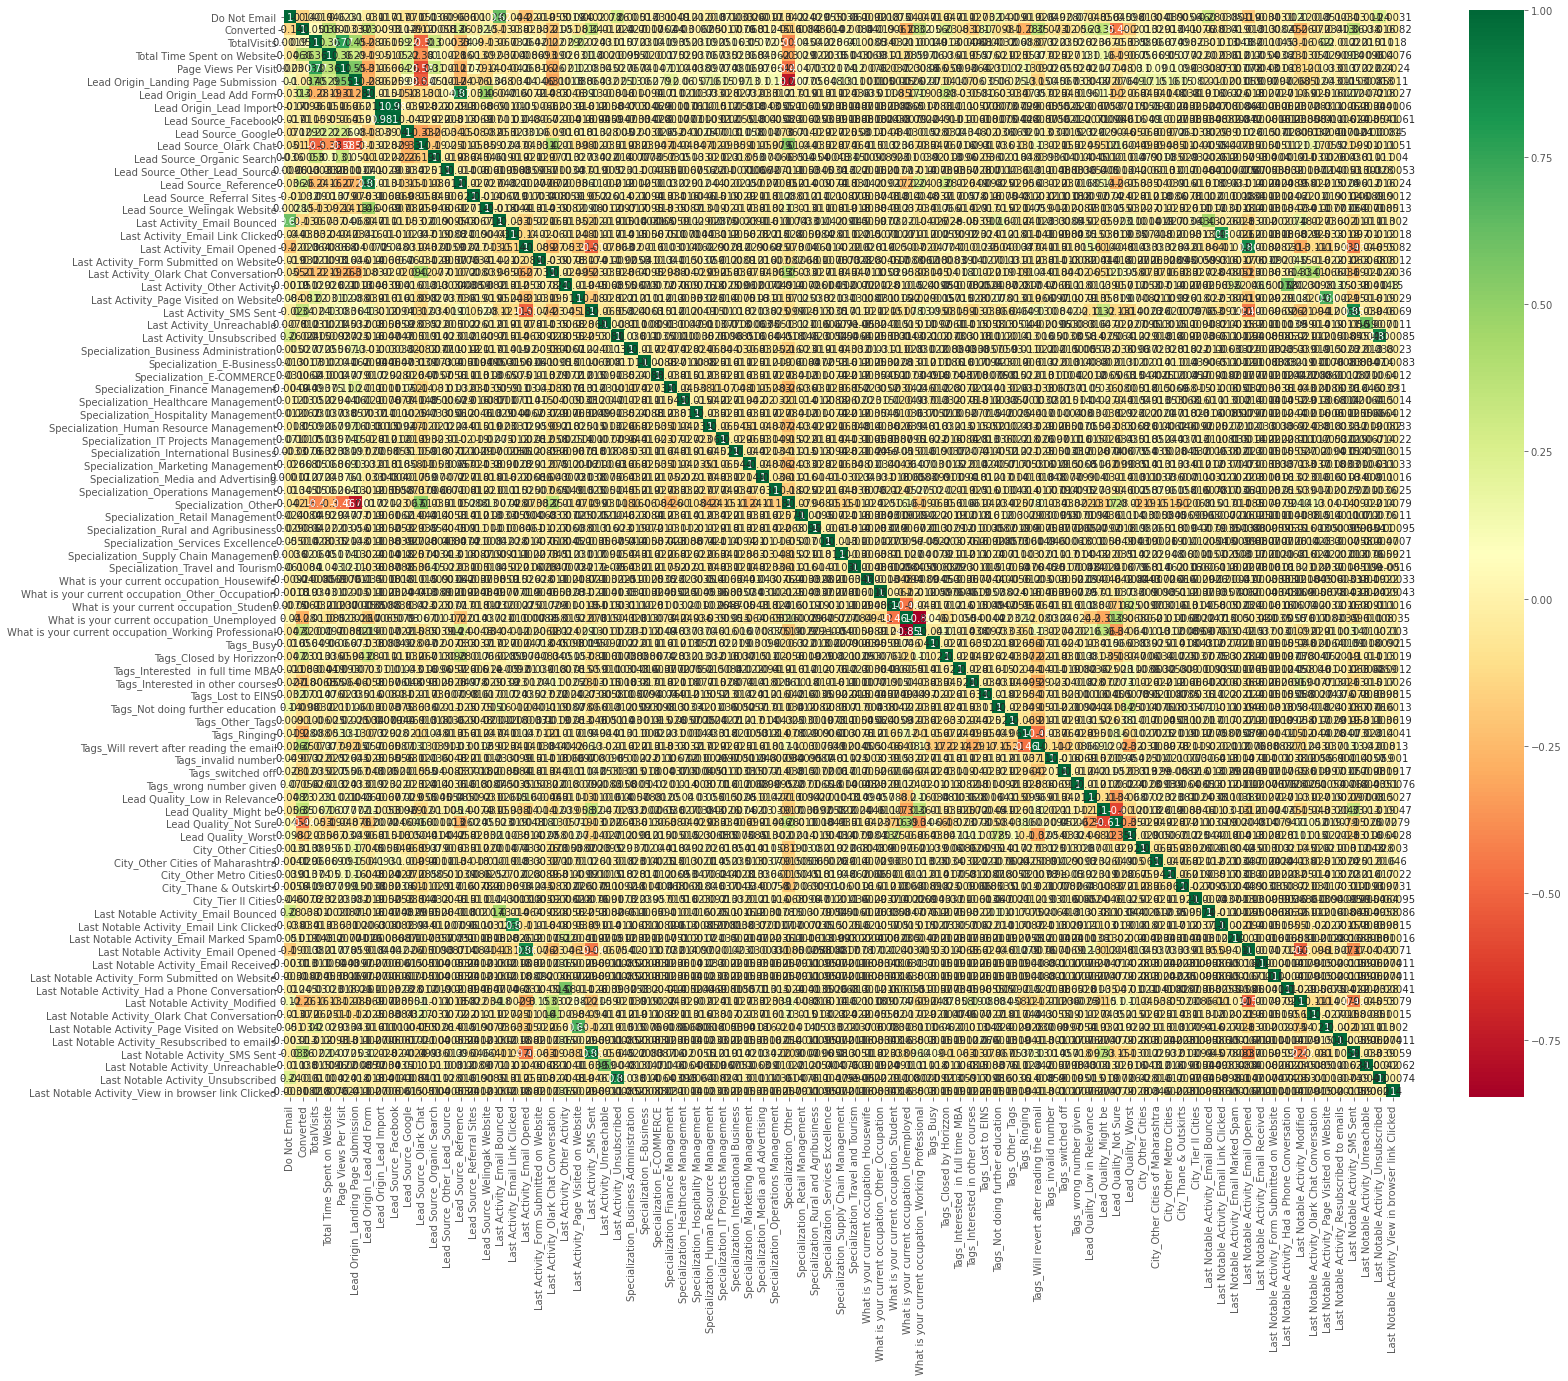

In [102]:
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 20))
sns.heatmap(df_lead.corr(), cmap='RdYlGn', annot = True)
plt.show()

In [103]:
print('Total number of columns after One-Hot Encoding : ',len(df_lead.columns))

Total number of columns after One-Hot Encoding :  86


There are 86 columns in Heatmap which makes it difficult to interpret.

In [104]:
# Correlation between different numerical variables for both the Converted and not-converted cases
conv_corr = df_lead.corr()
conv_corr

Do Not Email  Converted  \
Do Not Email                                            1.000000  -0.140786   
Converted                                              -0.140786   1.000000   
TotalVisits                                             0.001856   0.050742   
Total Time Spent on Website                            -0.046192   0.359261   
Page Views Per Visit                                    0.022891   0.000329   
...                                                          ...        ...   
Last Notable Activity_Resubscribed to emails           -0.003073   0.013451   
Last Notable Activity_SMS Sent                         -0.029608   0.360233   
Last Notable Activity_Unreachable                      -0.010516   0.037893   
Last Notable Activity_Unsubscribed                      0.241202  -0.016286   
Last Notable Activity_View in browser link Clicked     -0.003073  -0.008194   

                                                    TotalVisits  \
Do Not Email                                           0.001856   
Converted                                              0.050742   
TotalVisits                                            1.000000   
Total Time Spent on Website                            0.361207   
Page Views Per Visit                                   0.766567   
...                                                         ...   
Last Notable Activity_Resubscribed to emails          -0.012052   
Last Notable Activity_SMS Sent                         0.021815   
Last Notable Activity_Unreachable                      0.015285   
Last Notable Activity_Unsubscribed                     0.010927   
Last Notable Activity_View in browser link Clicked     0.018154   

                                                    Total Time Spent on Website  \
Do Not Email                                                          -0.046192   
Converted                                                              0.359261   
TotalVisits                                                            0.361207   
Total Time Spent on Website                                            1.000000   
Page Views Per Visit                                                   0.364735   
...                                                                         ...   
Last Notable Activity_Resubscribed to emails                          -0.009298   
Last Notable Activity_SMS Sent                                         0.137169   
Last Notable Activity_Unreachable                                      0.009594   
Last Notable Activity_Unsubscribed                                     0.003951   
Last Notable Activity_View in browser link Clicked                    -0.007584   

                                                    Page Views Per Visit  \
Do Not Email                                                    0.022891   
Converted                                                       0.000329   
TotalVisits                                                     0.766567   
Total Time Spent on Website                                     0.364735   
Page Views Per Visit                                            1.000000   
...                                                                  ...   
Last Notable Activity_Resubscribed to emails                   -0.013283   
Last Notable Activity_SMS Sent                                  0.071517   
Last Notable Activity_Unreachable                               0.021695   
Last Notable Activity_Unsubscribed                              0.024119   
Last Notable Activity_View in browser link Clicked              0.002369   

                                                    Lead Origin_Landing Page Submission  \
Do Not Email                                                                   0.099661   
Converted                                                                     -0.037481   
TotalVisits                                                                    0.454350   
Total Time Spent on Webs

In [105]:
# Unstacking the correlation matrix to find out top correlations
conv_corr_unstacked = conv_corr.unstack().sort_values(kind="quicksort")
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Import                Lead Source_Facebook                             0.983684
Last Activity_Unsubscribed             Last Notable Activity_Unsubscribed               0.872656
Lead Origin_Lead Add Form              Lead Source_Reference                            0.866191
Last Activity_Email Opened             Last Notable Activity_Email Opened               0.861636
Last Activity_SMS Sent                 Last Notable Activity_SMS Sent                   0.853102
Last Activity_Email Link Clicked       Last Notable Activity_Email Link Clicked         0.800686
TotalVisits                            Page Views Per Visit                             0.766567
Last Activity_Page Visited on Website  Last Notable Activity_Page Visited on Website    0.691811
Do Not Email                           Last Activity_Email Bounced                      0.620041
Last Activity_Unreachable              Last Notable Activity_Unreachable                0.594369
dtype: float64

In [106]:
# Dropping highly correlated features

X_test = X_test.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], 1)
X_train = X_train.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], 1)

In [107]:
conv_corr = X_train.corr()

In [108]:
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Add Form     Lead Source_Reference                             0.859537
TotalVisits                   Page Views Per Visit                              0.766735
Do Not Email                  Last Activity_Email Bounced                       0.624939
Last Activity_Other Activity  Last Notable Activity_Had a Phone Conversation    0.593057
Page Views Per Visit          Lead Origin_Landing Page Submission               0.550102
Lead Source_Olark Chat        Specialization_Other                              0.505771
Lead Origin_Lead Add Form     Lead Source_Welingak Website                      0.468225
Last Activity_Email Bounced   Last Notable Activity_Email Bounced               0.450911
TotalVisits                   Lead Origin_Landing Page Submission               0.447765
Lead Source_Olark Chat        Last Activity_Olark Chat Conversation             0.419173
dtype: float64

## 7. Model Building and Feature Selection Using RFE

### 7.1 RFE (Recursive Feature Elimination)

In [109]:
# Starting with 15 features selected by RFE
# We will then optimize the model further by inspecting VIF and p-value of the features

logreg = LogisticRegression()
rfe = RFE(logreg, 15)  
rfe = rfe.fit(X_train, y_train)

In [110]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 46),
 ('Total Time Spent on Website', False, 4),
 ('Page Views Per Visit', False, 36),
 ('Lead Origin_Landing Page Submission', False, 13),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 14),
 ('Lead Source_Google', False, 34),
 ('Lead Source_Olark Chat', False, 3),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Other_Lead_Source', False, 32),
 ('Lead Source_Reference', False, 63),
 ('Lead Source_Referral Sites', False, 48),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 29),
 ('Last Activity_Email Link Clicked', False, 22),
 ('Last Activity_Email Opened', False, 26),
 ('Last Activity_Form Submitted on Website', False, 55),
 ('Last Activity_Olark Chat Conversation', False, 21),
 ('Last Activity_Other Activity', False, 6),
 ('Last Activity_Page Visited on Website', False, 25),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 11),
 

In [111]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [112]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other_Lead_Source',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specializa

### 7.2 Building model using statsmodel, for the detailed statistics

#### Model-1

In [113]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1553.1
Date:                Mon, 14 Jun 2021   Deviance:                       3106.2
Time:                        14:14:39   Pearson chi2:                 4.04e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.0794      0.217     -4.963      0.000      -1.506      -0.653
Do Not Email                                     -1.1895      0.221     -5.376      0.000      -1.623      -0.756
Lead Origin_Lead Add Form                         0.8693      0.366      2.372      0.018       0.151       1.587
Lead Source_Welingak Website                      3.2594      0.820      3.976      0.000       1.653       4.866
Last Activity_SMS Sent                            1.9538      0.103     19.039      0.000       1.753       2.155
Tags_Busy                                         3.4717      0.323     10.757      0.000       2.839       4.104
Tags_Closed by Horizzon                           8.4090      0.775     10.849      0.000       6.890       9.928
Tags_Lost to EINS                                 9.4298      0.766     12.317      0.000       7.929      10.930
Tags_Ringing                                     -1.9594      0.331     -5.911      0.000      -2.609      -1.310
Tags_Will revert after reading the email          3.6656      0.231     15.900      0.000       3.214       4.117
Tags_invalid number                             -22.4206   1.34e+04     -0.002      0.999   -2.62e+04    2.62e+04
Tags_switched off                                -2.5297      0.584     -4.331      0.000      -3.674      -1.385
Lead Quality_Not Sure                            -3.4872      0.130    -26.738      0.000      -3.743      -3.232
Lead Quality_Worst                               -3.9571      0.834     -4.745      0.000      -5.592      -2.323
Last Notable Activity_Modified                   -1.6959      0.107    -15.830      0.000      -1.906      -1.486
Last Notable Activity_Olark Chat Conversation    -1.3029      0.352     -3.699      0.000      -1.993      -0.612
=================================================================================================================
"""

In [115]:
col= col.drop('Tags_invalid number')
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [116]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1559.1
Date:                Mon, 14 Jun 2021   Deviance:                       3118.3
Time:                        14:15:22   Pearson chi2:                 3.94e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2486      0.218     -5.725      0.000      -1.676      -0.821
Do Not Email                                     -1.1805      0.221     -5.350      0.000      -1.613      -0.748
Lead Origin_Lead Add Form                         0.9081      0.369      2.464      0.014       0.186       1.630
Lead Source_Welingak Website                      3.2182      0.820      3.923      0.000       1.611       4.826
Last Activity_SMS Sent                            1.9270      0.102     18.901      0.000       1.727       2.127
Tags_Busy                                         3.6495      0.322     11.338      0.000       3.019       4.280
Tags_Closed by Horizzon                           8.5559      0.776     11.031      0.000       7.036      10.076
Tags_Lost to EINS                                 9.5786      0.766     12.504      0.000       8.077      11.080
Tags_Ringing                                     -1.7714      0.330     -5.368      0.000      -2.418      -1.125
Tags_Will revert after reading the email          3.8317      0.231     16.579      0.000       3.379       4.285
Tags_switched off                                -2.3367      0.583     -4.008      0.000      -3.479      -1.194
Lead Quality_Not Sure                            -3.4792      0.130    -26.743      0.000      -3.734      -3.224
Lead Quality_Worst                               -3.9437      0.836     -4.720      0.000      -5.581      -2.306
Last Notable Activity_Modified                   -1.6821      0.107    -15.737      0.000      -1.892      -1.473
Last Notable Activity_Olark Chat Conversation    -1.3049      0.352     -3.706      0.000      -1.995      -0.615
=================================================================================================================
"""

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2}$

In [121]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10                          Lead Quality_Not Sure  2.97
8        Tags_Will revert after reading the email  2.66
12                 Last Notable Activity_Modified  1.68
3                          Last Activity_SMS Sent  1.62
1                       Lead Origin_Lead Add Form  1.58
7                                    Tags_Ringing  1.51
2                    Lead Source_Welingak Website  1.35
5                         Tags_Closed by Horizzon  1.17
0                                    Do Not Email  1.12
11                             Lead Quality_Worst  1.12
4                                       Tags_Busy  1.11
9                               Tags_switched off  1.09
6                               Tags_Lost to EINS  1.06
13  Last Notable Activity_Olark Chat Conversation  1.05

So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

In [122]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.289842
1012    0.111387
9226    0.001918
4750    0.737087
7987    0.993914
1281    0.989122
2880    0.289842
4971    0.700282
7536    0.929765
1248    0.001918
dtype: float64

In [123]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.2898423 , 0.11138705, 0.00191849, 0.73708704, 0.99391432,
       0.98912239, 0.2898423 , 0.700282  , 0.92976455, 0.00191849])

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [124]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Convert  Convert_Prob  Prospect ID
0        0      0.289842         3009
1        0      0.111387         1012
2        0      0.001918         9226
3        1      0.737087         4750
4        1      0.993914         7987

#### Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels

In [125]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Convert  Convert_Prob  Prospect ID  predicted
0        0      0.289842         3009          0
1        0      0.111387         1012          0
2        0      0.001918         9226          0
3        1      0.737087         4750          1
4        1      0.993914         7987          1

#### Making the Confusion matrix

In [126]:
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

[[3761  144]
 [ 360 2086]]


In [127]:
# The confusion matrix indicates as below
# predicted     not_converted    converted
# Actual
# not_converted        3761      144
# converted            360       2086  

In [128]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy : 0.920642418516769


#### Metrics beyond simply accuracy

In [129]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [130]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8528209321340965


In [131]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.963124199743918


In [132]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.03687580025608195


In [133]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.9354260089686098


In [134]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.9126425624848338


### Plotting the ROC Curve
#### An ROC curve

- shows tradeoff between sensitivity and specificity (increase in one will cause decrease in other).
- The closer the curve follows the y-axis and then the top border of the ROC space, means more area under the curve and the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space i.e. the reference line, means less area and the less accurate is the test.

Here, our goal is to have achieve good sensitivity score

In [135]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [136]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

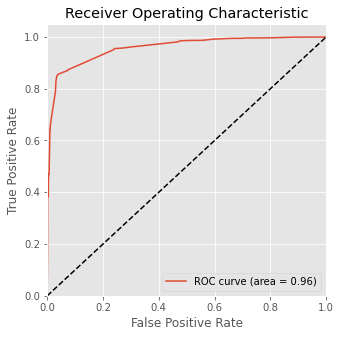

In [137]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

#### The ROC Curve should be a value close to 1. We are getting a good value of 0.96 indicating a good predictive model.

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:

In [138]:
# Predicting Convert status with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Convert  Convert_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0        0      0.289842         3009          0    1    1    1    0    0   
1        0      0.111387         1012          0    1    1    0    0    0   
2        0      0.001918         9226          0    1    0    0    0    0   
3        1      0.737087         4750          1    1    1    1    1    1   
4        1      0.993914         7987          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    0    0  
4    1    1    1    1    1

In [139]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
df = pd.DataFrame(columns = ['probability_score','accuracy_score','sensitivity_score','specificity_score','precision_score'])
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy_score= (cm1[0,0]+cm1[1,1])/total1
    specificity_score = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity_score = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    precision_score = cm1[1,1]/(cm1[1,1]+cm1[0,1])   # Positive Predictive Value is Precision
    df.loc[i] =[ i ,accuracy_score,sensitivity_score,specificity_score,precision_score]
print(df)

     probability_score  accuracy_score  sensitivity_score  specificity_score  \
0.0                0.0        0.385136           1.000000           0.000000   
0.1                0.1        0.807117           0.959526           0.711652   
0.2                0.2        0.820343           0.956664           0.734955   
0.3                0.3        0.905999           0.872445           0.927017   
0.4                0.4        0.919540           0.856092           0.959283   
0.5                0.5        0.920642           0.852821           0.963124   
0.6                0.6        0.920328           0.851594           0.963380   
0.7                0.7        0.920328           0.848324           0.965429   
0.8                0.8        0.861912           0.659853           0.988476   
0.9                0.9        0.856086           0.643500           0.989245   

     precision_score  
0.0         0.385136  
0.1         0.675785  
0.2         0.693333  
0.3         0.882183  
0.4 

<Figure size 1296x576 with 0 Axes>

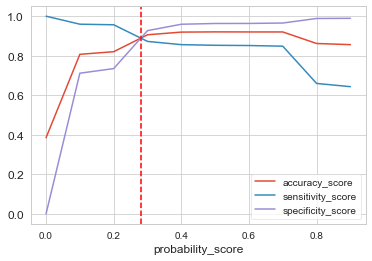

In [140]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(18,8))
sns.set_style("whitegrid")
df.plot.line(x='probability_score', y=['accuracy_score','sensitivity_score','specificity_score'])
#plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.28, color='r', linestyle='--') # additing axline
plt.yticks(size=12)
plt.show()

From the curve above, 0.28 is the optimum point to take it as a cutoff probability.

In [141]:
y_train_pred_final['final_Predicted']= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.28 else 0)
y_train_pred_final.head()

Convert  Convert_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0        0      0.289842         3009          0    1    1    1    0    0   
1        0      0.111387         1012          0    1    1    0    0    0   
2        0      0.001918         9226          0    1    0    0    0    0   
3        1      0.737087         4750          1    1    1    1    1    1   
4        1      0.993914         7987          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_Predicted  
0    0    0    0    0    0                1  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    1    1    1    0    0                1  
4    1    1    1    1    1                1

#### Assigning Lead Score to the Training data

In [142]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map( lambda x: round(x*100))

y_train_pred_final[['Convert','Convert_Prob','Prospect ID','final_Predicted','Lead_Score']].head()

Convert  Convert_Prob  Prospect ID  final_Predicted  Lead_Score
0        0      0.289842         3009                1          29
1        0      0.111387         1012                0          11
2        0      0.001918         9226                0           0
3        1      0.737087         4750                1          74
4        1      0.993914         7987                1          99

## 8. Model Evaluation On Train Data Set

In [143]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.final_Predicted))

Accuracy : 0.8359313493937962


In [144]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.final_Predicted )
confusion2

array([[2987,  918],
       [ 124, 2322]], dtype=int64)

In [145]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [146]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.9493049877350777


In [147]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7649167733674775


In [148]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.2350832266325224


In [149]:
#Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7166666666666667


In [150]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.9601414336226294


### Observation:

So as we can see above the model seems to be performing well. The ROC curve has a value of 0.96, which is very good. We have the following values for the Train Data:

Accuracy : 83.59%

Sensitivity : 94.93%

Specificity : 76.49%

### 8.1 Precision and Recall

#### Precision = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.
#### Recall = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.

In [151]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
confusion

array([[3761,  144],
       [ 360, 2086]], dtype=int64)

In [152]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.9354260089686098


In [153]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.8528209321340965


#### Using sklearn utilities for the same

In [154]:
from sklearn.metrics import precision_score, recall_score

In [155]:
print("Precision :",precision_score(y_train_pred_final.Convert , y_train_pred_final.predicted))

Precision : 0.9354260089686098


In [156]:
print("Recall :",recall_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Recall : 0.8528209321340965


### 8.2 Precision-Recall Trade off

In [157]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Convert, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Convert, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [158]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

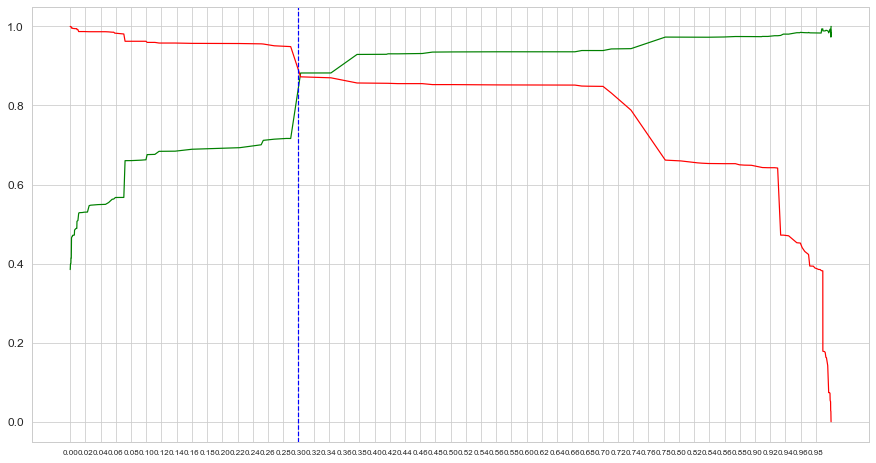

In [159]:
# plotting a trade-off curve between precision and recall
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.30, color='b', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.02),size=8)
plt.yticks(size=12)

plt.show()

Based on the Precision and Recall trade off, we got a cut off value of approximately 0.30

## 9. Making predictions on the test set

#### Scaling the test data

In [160]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [161]:
X_test = X_test[col]
X_test.head()

Do Not Email  Lead Origin_Lead Add Form  Lead Source_Welingak Website  \
3271             0                          0                             0   
1490             0                          0                             0   
7936             0                          0                             0   
4216             0                          1                             0   
3830             0                          0                             0   

      Last Activity_SMS Sent  Tags_Busy  Tags_Closed by Horizzon  \
3271                       0          0                        0   
1490                       0          0                        0   
7936                       0          0                        0   
4216                       0          0                        1   
3830                       0          0                        0   

      Tags_Lost to EINS  Tags_Ringing  \
3271                  0             0   
1490                  0             0   
7936                  0             0   
4216                  0             0   
3830                  0             0   

      Tags_Will revert after reading the email  Tags_switched off  \
3271                                         1                  0   
1490                                         1                  0   
7936                                         1                  0   
4216                                         0                  0   
3830                                         1                  0   

      Lead Quality_Not Sure  Lead Quality_Worst  \
3271                      1                   0   
1490                      0                   0   
7936                      1                   0   
4216                      0                   0   
3830                      1                   0   

      Last Notable Activity_Modified  \
3271                               0   
1490                               0   
7936                               0   
4216                               1   
3830                               0   

      Last Notable Activity_Olark Chat Conversation  
3271                                              0  
1490                                              0  
7936                                              0  
4216                                              0  
3830                                              0

In [162]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.289842
1490    0.929765
7936    0.289842
4216    0.998548
3830    0.289842
1800    0.929765
6507    0.010229
4821    0.000854
4223    0.995584
4714    0.342721
dtype: float64

In [163]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [164]:
# Let's see the head
y_pred_1.head()

0
3271  0.289842
1490  0.929765
7936  0.289842
4216  0.998548
3830  0.289842

In [165]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [166]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [167]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [168]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [169]:
y_pred_final.head()

Converted  Prospect ID         0
0          0         3271  0.289842
1          1         1490  0.929765
2          0         7936  0.289842
3          1         4216  0.998548
4          0         3830  0.289842

In [170]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})
y_pred_final

Converted  Prospect ID  Convert_Prob
0             0         3271      0.289842
1             1         1490      0.929765
2             0         7936      0.289842
3             1         4216      0.998548
4             0         3830      0.289842
...         ...          ...           ...
2718          0          850      0.070553
2719          0         2879      0.001642
2720          1         6501      0.989122
2721          0         7155      0.070553
2722          0          376      0.070553

[2723 rows x 3 columns]

In [171]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Convert_Prob'])

In [172]:
# Let's see the head of y_pred_final
y_pred_final.head()

Prospect ID  Converted  Convert_Prob
0         3271          0      0.289842
1         1490          1      0.929765
2         7936          0      0.289842
3         4216          1      0.998548
4         3830          0      0.289842

In [173]:
y_pred_final['Lead_Score'] = y_pred_final.Convert_Prob.map( lambda x: round(x*100))
y_pred_final['final_Predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.28 else 0)
y_pred_final.head()

Prospect ID  Converted  Convert_Prob  Lead_Score  final_Predicted
0         3271          0      0.289842          29                1
1         1490          1      0.929765          93                1
2         7936          0      0.289842          29                1
3         4216          1      0.998548         100                1
4         3830          0      0.289842          29                1

In [174]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted))

Accuracy : 0.8156445097319134


In [175]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1303,  431],
       [  71,  918]], dtype=int64)

In [176]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [177]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.9282103134479271


In [178]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.751441753171857


In [179]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6805040770941438

In [180]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9282103134479271

### Observation:
After running the model on the Test Data these are the figures we obtain:

Accuracy : 81.56%

Sensitivity : 92.82%

Specificity : 75.14% 

### 9.1 Determining Feature Importance

In [194]:
print("Features used in Final Model :", col)

Features used in Final Model : Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')


Selecting the coefficients of the selected features from our final model excluding the intercept

In [195]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params.sort_values(ascending=False)

Tags_Lost to EINS                                9.58
Tags_Closed by Horizzon                          8.56
Tags_Will revert after reading the email         3.83
Tags_Busy                                        3.65
Lead Source_Welingak Website                     3.22
Last Activity_SMS Sent                           1.93
Lead Origin_Lead Add Form                        0.91
Do Not Email                                    -1.18
Last Notable Activity_Olark Chat Conversation   -1.30
Last Notable Activity_Modified                  -1.68
Tags_Ringing                                    -1.77
Tags_switched off                               -2.34
Lead Quality_Not Sure                           -3.48
Lead Quality_Worst                              -3.94
dtype: float64

Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

In [196]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

top_predictors = new_params
top_predictors = 100.0 * (top_predictors / top_predictors.max())
top_predictors.sort_values(ascending=False)

Tags_Lost to EINS                               100.00
Tags_Closed by Horizzon                          89.32
Tags_Will revert after reading the email         40.00
Tags_Busy                                        38.10
Lead Source_Welingak Website                     33.60
Last Activity_SMS Sent                           20.12
Lead Origin_Lead Add Form                         9.48
Do Not Email                                    -12.32
Last Notable Activity_Olark Chat Conversation   -13.62
Last Notable Activity_Modified                  -17.56
Tags_Ringing                                    -18.49
Tags_switched off                               -24.39
Lead Quality_Not Sure                           -36.32
Lead Quality_Worst                              -41.17
dtype: float64

In [197]:
sorted_idx = np.argsort(top_predictors,kind='quicksort',order='list of str')
sorted_idx.sort_values(ascending=False)

Tags_Closed by Horizzon                          13
Tags_Busy                                        12
Do Not Email                                     11
Lead Origin_Lead Add Form                        10
Lead Source_Welingak Website                      9
Lead Quality_Worst                                8
Last Activity_SMS Sent                            7
Last Notable Activity_Olark Chat Conversation     6
Last Notable Activity_Modified                    5
Lead Quality_Not Sure                             4
Tags_Will revert after reading the email          3
Tags_switched off                                 2
Tags_Ringing                                      1
Tags_Lost to EINS                                 0
dtype: int64

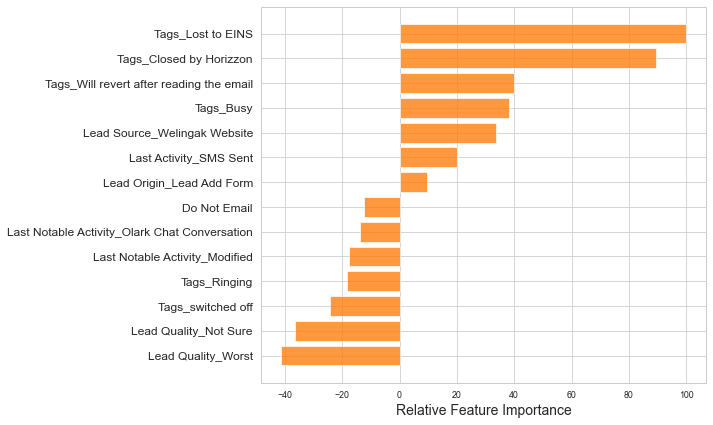

In [198]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, top_predictors[sorted_idx], align='center', color = 'tab:orange',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

Selecting Top 3 features which contribute most towards the probability of a lead getting converted

In [199]:
pd.DataFrame(top_predictors).reset_index().sort_values(by=0,ascending=False).head(3)

index      0
6                         Tags_Lost to EINS 100.00
5                   Tags_Closed by Horizzon  89.32
8  Tags_Will revert after reading the email  40.00

### Result:

#### Train data:

Accuracy : 83.59%

Sensitivity : 94.93%

Specificity : 76.49%
    
#### Test data:

Accuracy : 81.56%

Sensitivity : 92.82%

Specificity : 75.14% 

## 10. Conclusion:

- The logistic regression model predicts the probability of the target variable having a certain value, rather than predicting the value of the target variable directly. Then a cutoff of the probability is used to obtain the predicted value of the target variable.

- Here, the logistic regression model is used to predict the probabilty of conversion of a customer.

- Optimum cut off is chosen to be 0.28 i.e. any lead with greater than 0.28 probability of converting is predicted as Hot Lead (customer will convert) and any lead with 0.28 or less probability of converting is predicted as Cold Lead (customer will not convert)

- Our final Logistic Regression Model is built with 14 features.

#### Features used in final model are:
['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation']
       
- The top three categorical/dummy variables in the final model are ‘Tags_Lost to EINS’, ‘Tags_Closed by Horizzon’, ‘ Tags_Will revert after reading the email ’ with respect to the absolute value of their coefficient factors.

- ‘Tags_Lost to EINS’, ‘Tags_Closed by Horizzon’ 'Tags_Will revert after reading the email' are obtained by encoding original categorical variable ‘Tags’. 

 - Tags_Lost to EINS (Coefficient factor = 9.578632)
 
 - Tags_Closed by Horizzon (Coefficient factor = 8.555901)
 
 - Tags_Will revert after reading the email (Coefficient factor =  3.83)

- The final model has Sensitivity of 0.9282, this means the model is able to predict 92% customers out of all the converted customers, (Positive conversion) correctly.

- The final model has Precision of 0.68, this means 68% of predicted hot leads are True Hot Leads.